In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Load the encoded & cleaned dataset from Notebook 01
df = pd.read_csv("../data/heart_clean_encoded.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Shape:", X.shape)


Shape: (297, 18)


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# === 4. Apply PCA ===
pca = PCA(n_components=None)  # keep all components first
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA shape:", X_pca.shape)


Original shape: (297, 18)
PCA shape: (297, 18)


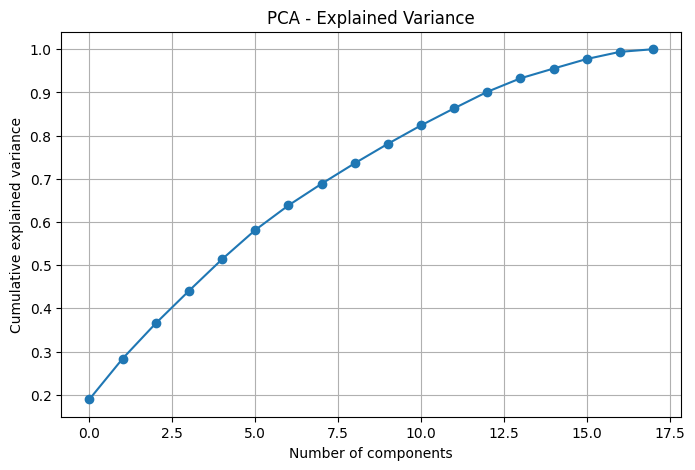

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()


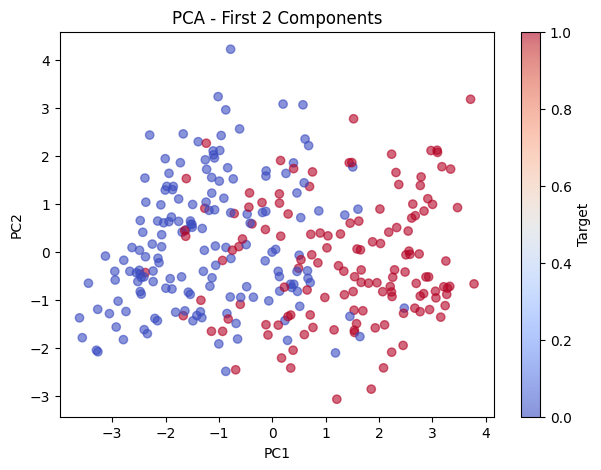

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Components")
plt.colorbar(label="Target")
plt.show()


In [11]:
# Convert PCA results into DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["target"] = y.values

# Save to CSV
pca_df.to_csv("heart_pca.csv", index=False)
print("Saved PCA dataset as heart_pca.csv with shape:", pca_df.shape)


Saved PCA dataset as heart_pca.csv with shape: (297, 19)
